In [3]:
import pandas as pd
df = pd.read_csv('EV_market.csv')
print(df.info())

print(df.describe())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB
None
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.

In [5]:
df_encoded = pd.get_dummies(df, columns=['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment'], drop_first=True)

print(df_encoded.head())

   AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  Seats  \
0       4.6           233       450              161             940      5   
1      10.0           160       270              167             250      5   
2       4.7           210       400              181             620      5   
3       6.8           180       360              206             560      5   
4       9.5           145       170              168             190      4   

   PriceEuro  Brand_Audi  Brand_BMW  Brand_Byton  ...  BodyStyle_SUV  \
0      55480       False      False        False  ...          False   
1      30000       False      False        False  ...          False   
2      56440       False      False        False  ...          False   
3      68040       False       True        False  ...           True   
4      32997       False      False        False  ...          False   

   BodyStyle_Sedan  BodyStyle_Station  Segment_B  Segment_C  Segment_D  \
0             True

In [8]:
X = df_encoded.drop(columns=['PriceEuro'])  
y = df['PriceEuro'] 

features_scaled = StandardScaler().fit_transform(X)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=principal_components)
pca_df['PriceEuro'] = y.values

print(pca_df.head())

          0         1         2         3         4         5         6  \
0  4.063817 -1.437363 -0.712065  1.124674  0.111176 -1.725847  1.336582   
1 -2.322954 -1.206447 -0.940422 -1.679176  2.740543 -1.602187 -0.781247   
2  2.121550 -0.801466 -0.379307  0.751502 -0.064895 -0.286534  2.719955   
3  1.197535  0.493606 -1.203852 -1.886088  0.379427 -2.499548  1.877959   
4 -3.106053 -1.499843 -2.024919 -1.022550 -0.777246 -2.606050 -0.906221   

          7         8         9  ...        85        86        87        88  \
0 -0.442723 -1.691539  0.038925  ...  0.000000 -0.000000 -0.000000 -0.000000   
1  0.020977  1.789936 -0.047042  ...  0.879166 -0.165453 -0.364895  0.193232   
2 -0.206275  0.832044  2.351107  ...  0.696866  0.326625 -0.277130 -1.402225   
3 -1.340084 -2.600843  0.771286  ...  1.327040 -0.030702 -1.991019 -0.657757   
4  1.253387 -1.267581  1.354104  ...  1.954511 -1.234755 -1.340965 -1.000913   

         89             90             91             92            

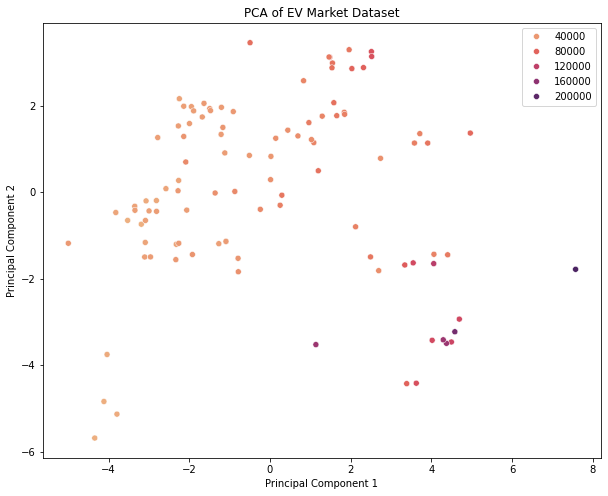

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x=0, y=1, hue='PriceEuro', palette='flare')
plt.title('PCA of EV Market Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [20]:
from sklearn.ensemble import RandomForestRegressor

X = df_encoded.drop(columns=['PriceEuro'])
y = df['PriceEuro']

model = RandomForestRegressor()
model.fit(X, y)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

                        feature    importance
157                   Segment_F  2.727438e-01
1                  TopSpeed_KmH  2.455380e-01
0                      AccelSec  2.269161e-01
3               Efficiency_WhKm  5.994038e-02
2                      Range_Km  4.823204e-02
..                          ...           ...
108                    Model_U5  6.411837e-07
122         Model_e-Niro 39 kWh  4.455468e-07
77                Model_Leaf e+  3.358266e-07
74   Model_Kona Electric 39 kWh  2.560895e-07
72         Model_IONIQ Electric  2.138199e-08

[160 rows x 2 columns]


In [18]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=10)  
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_]
print("Selected features: ", selected_features)

Selected features:  Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'Model_One', 'Model_Roadster',
       'PlugType_Type 2 CCS', 'Segment_F'],
      dtype='object')


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X[selected_features], y)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  -327117494.0040068


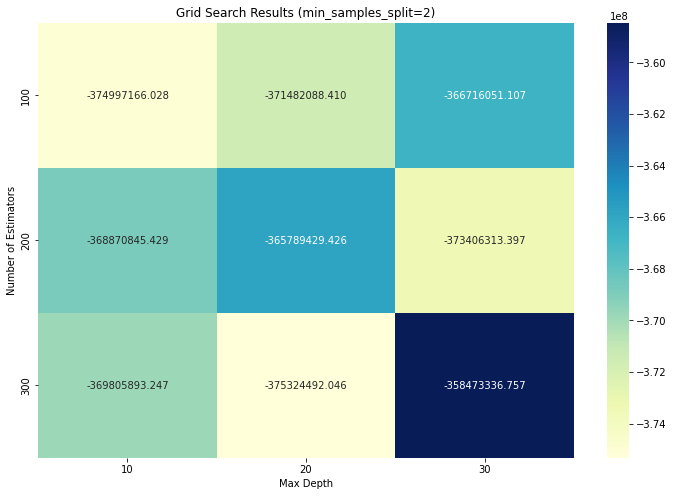

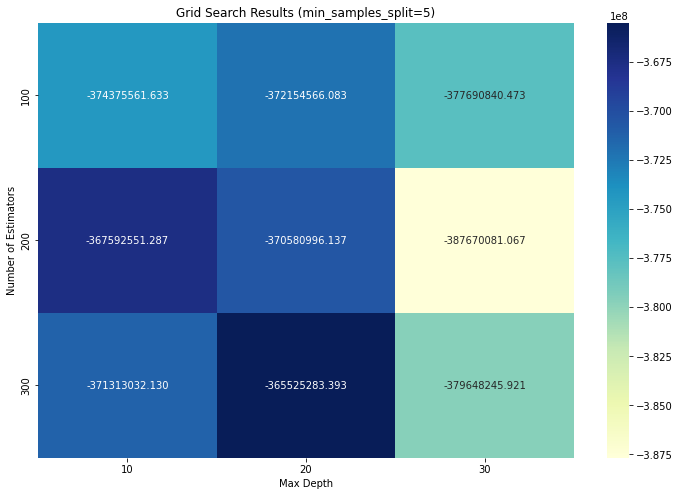

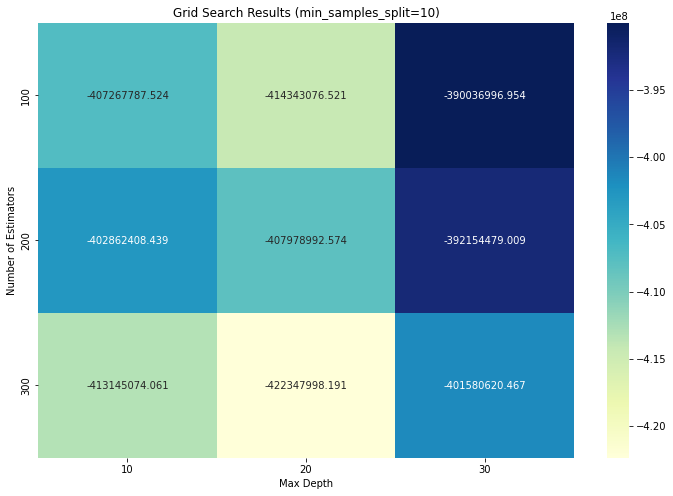

In [23]:
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
params = results['params']

results_df = pd.DataFrame(params)
results_df['mean_test_score'] = mean_test_scores

for min_samples_split in results_df['min_samples_split'].unique():
    subset_df = results_df[results_df['min_samples_split'] == min_samples_split]
    pivot_table = subset_df.pivot(index='n_estimators', columns='max_depth', values='mean_test_score')
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
    plt.title(f'Grid Search Results (min_samples_split={min_samples_split})')
    plt.xlabel('Max Depth')
    plt.ylabel('Number of Estimators')
    plt.show()
